In [1]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = sio.loadmat('data_matrices.mat')
electrode_freq_prepost = data['mattmatrix']
electrode_freq_prepost.shape

(19, 9, 2)

In [4]:
prepost_difference = np.squeeze(np.diff(electrode_freq_prepost, axis=2))
prepost_difference.shape

(19, 9)

In [5]:
n_electrodes, n_bands = prepost_difference.shape

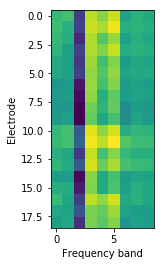

In [6]:
plt.imshow(prepost_difference)
plt.xlabel('Frequency band')
plt.ylabel('Electrode')

In [7]:
def sign_flip_test(vector, iterations=10000):
    n = len(vector)
    observed_mean = np.mean(vector)
    sample_means = []
    for i in range(iterations):
        flipper = np.random.choice([-1, 1], size=n)
        sample = vector * flipper
        sample_means.append(np.mean(sample))
    sample_means = np.array(sample_means)
    bottom_tail = np.sum(observed_mean >= sample_means)
    top_tail = np.sum(observed_mean <= sample_means)
    return (bottom_tail / float(iterations),
            top_tail / float(iterations), 
            sample_means)

In [8]:
lo, hi, dist = sign_flip_test(prepost_difference[0, :])
lo, hi, np.mean(prepost_difference[0, :])

(0.94020000000000004, 0.062399999999999997, 0.011823558855193544)

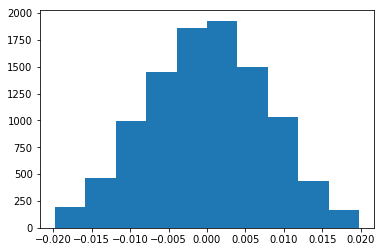

In [9]:
plt.hist(dist);

In [10]:
lo_hi = np.zeros((2, n_bands))
for band_no in range(n_bands):
    lo, hi, dist = sign_flip_test(prepost_difference[:, band_no])
    lo_hi[:, band_no] = [lo, hi]
lo_hi

array([[ 0.9999,  1.    ,  0.    ,  1.    ,  1.    ,  1.    ,  0.9944,
         1.    ,  1.    ],
       [ 0.0001,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.0056,
         0.    ,  0.    ]])

In [11]:
bonferroni_thresh = 0.05 / (n_bands * 2)
lo_hi < bonferroni_thresh

array([[False, False,  True, False, False, False, False, False, False],
       [ True,  True, False,  True,  True,  True, False,  True,  True]], dtype=bool)